# Predict heart disease via ML

This notebook looks into using various Python-based ML and data science libraries in an attempt to build an ML model in order to predict whether someone has a heart disease based on their medical attributes.

Steps:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

Check docs:
- https://www.kaggle.com/code/ronitf/predicting-heart-disease
- https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

## 3. Evaluation

> If we can reach > 95% accuracy at predicting heart disease during our PoC, we 'll pursue the project.

## 4. Features

Information about each of the features in our data.
```
age (Age of the patient in years)
sex (Male = 1/Female = 0)
cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl) (True = 1/False = 0)
restecg (resting electrocardiographic results) Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True = 1/False = 0)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
target: the predicted attribute (True = 1/False = 0)
```

In [1]:
## Import all the necessary toolds

# Regular EDA (Explanatory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
# Load data

df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration

The goal of this is to become familiar (subject matter expert) on the dataset we are working with.
1. What are we trying to solve?
2. What kind of data do we have?
3. What's missing from the data? How do we deal with missing data?
4. What are the outliers and why should we tend to them?
5. How can we add, modify, remove features to get more of our data?

In [3]:
# Let's find out how many classes we have
# 1. True
# 0. False
# The question is "does this person have a heart disease?"
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

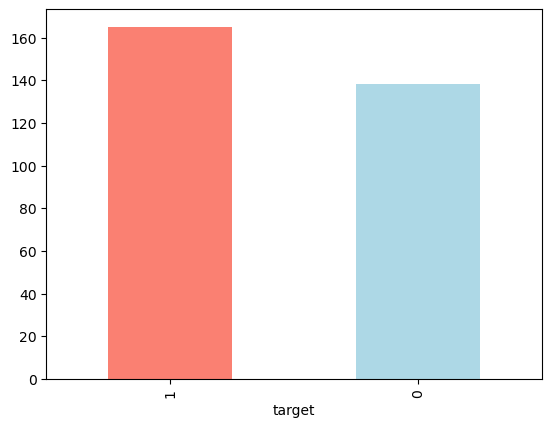

In [4]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [5]:
# Columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Check for null columns
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Generic stats
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency to Sex

In [8]:
# From doc
# 0. Female
# 1. Male
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


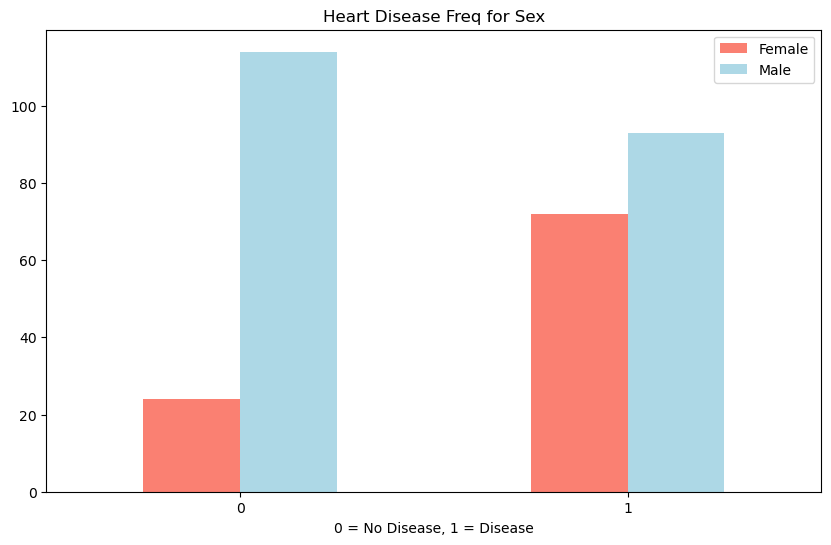

In [10]:
# Plot the data above
pd.crosstab(df.target, df.sex).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"],
);
plt.title("Heart Disease Freq for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.yticks(rotation=0);

In [11]:
# Thalach = Maximum heart rate achieved
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

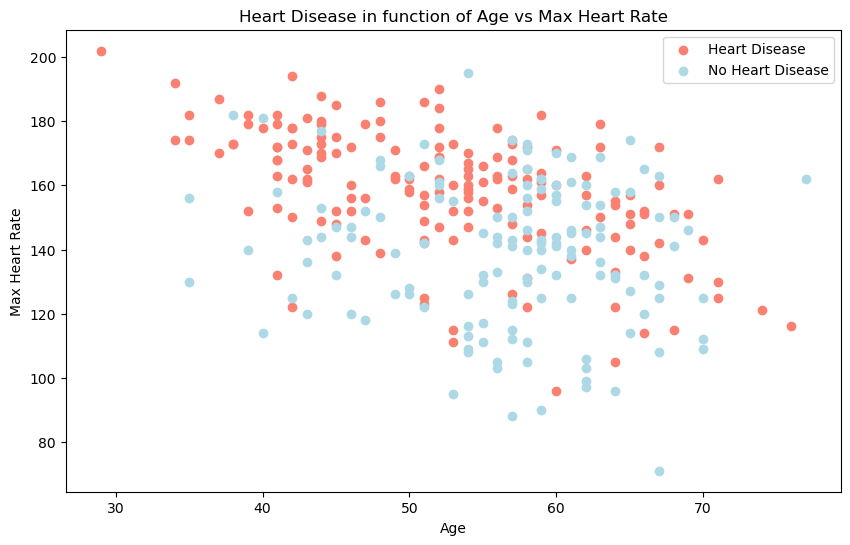

In [12]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(
    df.age[df.target == 1],
    df.thalach[df.target == 1],
    color="salmon"
)

# Scatter with negative examples
plt.scatter(
    df.age[df.target == 0],
    df.thalach[df.target == 0],
    color="lightblue"
)

# Add some helpful info
plt.title("Heart Disease in function of Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"]);

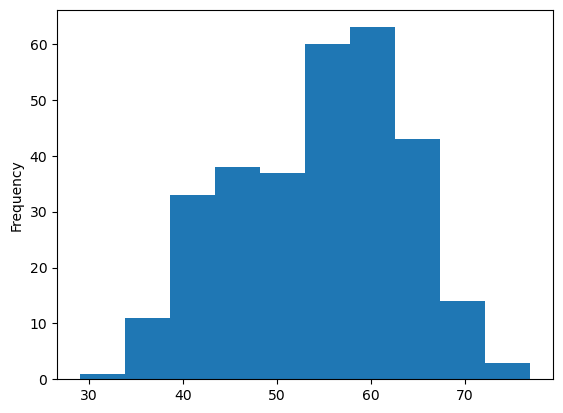

In [13]:
# Check the distribution of age with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

0. Typical
1. Atypical
2. Non-anginal
3. Asymptomatic

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


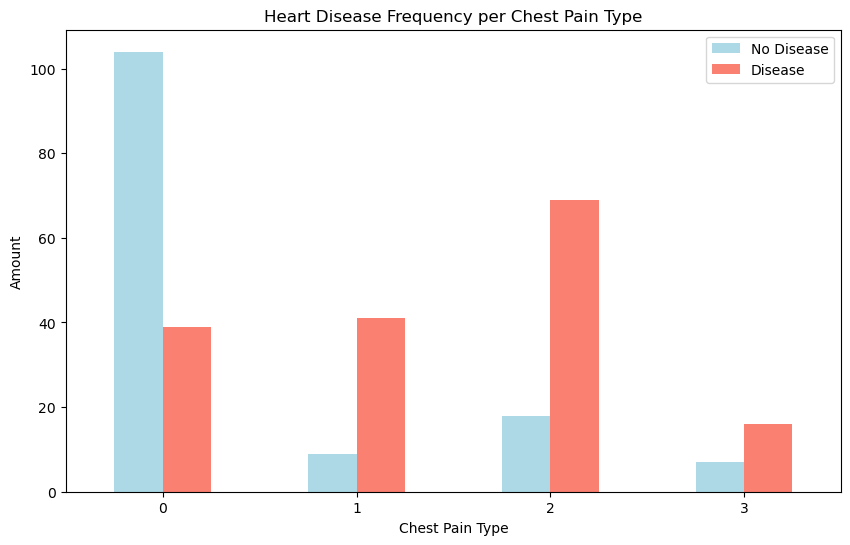

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["lightblue", "salmon"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [16]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


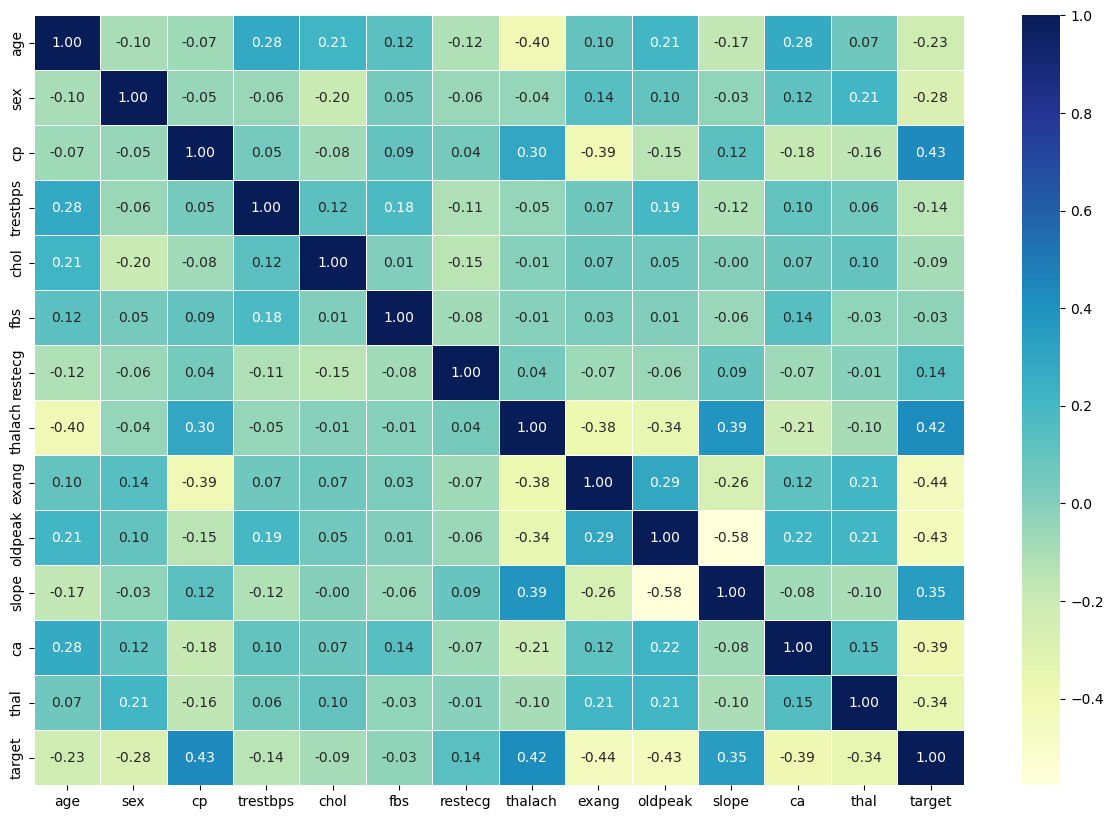

In [17]:
# Visualization for correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

# Uncomment the following lines if you need to move your labels if the visuals are broken
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [18]:
# Split X, y
X = df.drop("target", axis=1)
y = df.target

X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [19]:
# Split train + test data
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, y_train

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 188   50    1   2       140   233    0        1      163      0      0.6   
 71    51    1   2        94   227    0        1      154      1      0.0   
 106   69    1   3       160   234    1        0      131      0      0.1   
 270   46    1   0       120   249    0        0      144      0      0.8   
 102   63    0   1       140   195    0        1      179      0      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 1

Trying 3 different ML models:
1. Logistic Regression (Despite is names it is a linear model for classification rather than regression)
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [20]:
# Put models in a dict
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates an ML model
    models: a dict of scikit-learn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed (optional)
    np.random.seed(42)
    # Make a dict for scores
    model_scores = {}
    # Loop
    for name, model in models.items():
        # Fit
        model.fit(X_train, y_train)
        # Evaluate
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [21]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

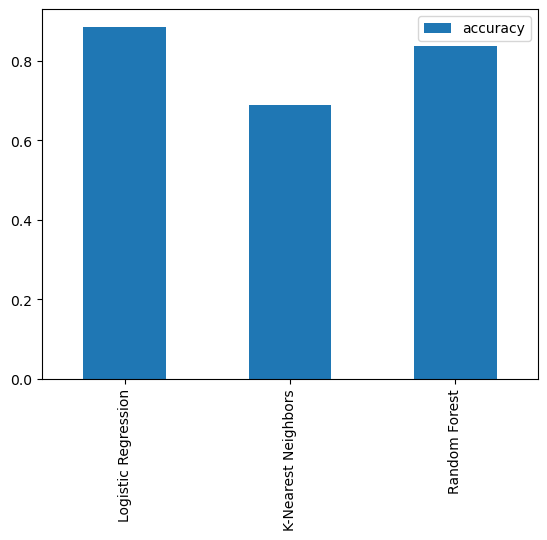

In [22]:
# Comparison
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Next steps:
* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC curve
* AUC curve (Area under the curve)

## Hyperparam tuning manually

In [23]:
# Let's tune KNN by hand

train_scores = []
test_scores = []

# Create a list of different acceptable values for hyperparams
neighbors = range(1, 21)

# Setup KNN
knn = KNeighborsClassifier()

# Loop through
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit
    knn.fit(X_train, y_train)
    # Update scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

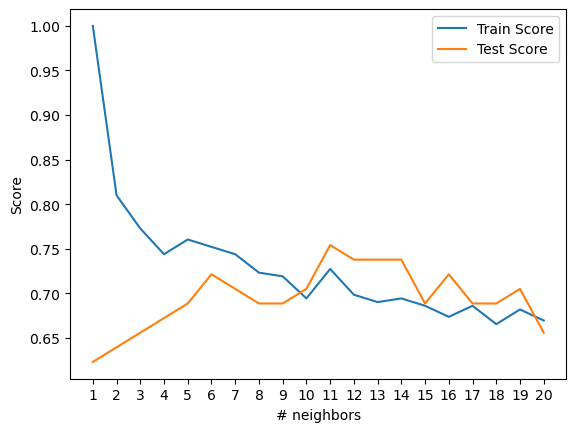

In [24]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("# neighbors")
plt.ylabel("Score")
plt.legend(["Train Score", "Test Score"]);

In [25]:
print(f"Max KNN score: {max(test_scores) * 100:.2f}%")

Max KNN score: 75.41%


## Hyperparam tuning with RandomizedSearchCV

We drop KNN as it is not performing well

In [26]:
# Create a hyperparam grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
    "max_iter": [1000]
}

# Create a hyperparm grid for Random Forest
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

In [27]:
np.random.seed(42)

# Instantiate RandomizedSearchCV
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=2
)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1000],
                                        'solver': ['liblinear']},
                   verbose=2)

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 1000, 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [30]:
np.random.seed(42)

# Random Forest
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=2
)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [31]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [45]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparam tuning with GridSearchCV

We drop Random Forest as it performs worse than Logistic Regression

In [32]:
# Create a hyperparam grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"],
    "max_iter": [1000]
}

# Instantiate GridSearchCV
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=2
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0001, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.00018873918221350977, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0.0003562247890262444, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END C=0

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [1000], 'solver': ['liblinear']},
             verbose=2)

In [33]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'max_iter': 1000, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluation of our tuned ML classifier

* ROC and AUC
* Confusion matrix
* Classification report
* Precision
* Recall
* F1

In [35]:
y_preds = gs_log_reg.predict(X_test)
y_preds, y_test

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 179    0
 228    0
 111    1
 246    0
 60     1
       ..
 249    0
 104    1
 300    0
 193    0
 184    0
 Name: target, Length: 61, dtype: int64)

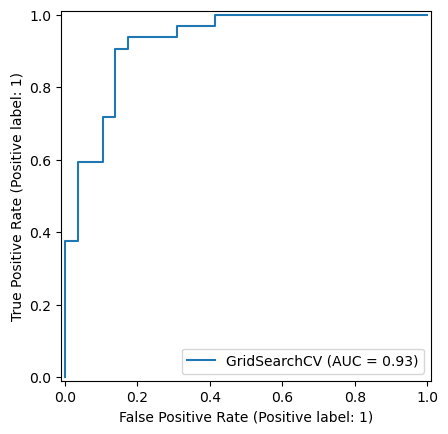

In [36]:
# ROC + AUC
# Obsolete: plot_roc_curve(gs_log_reg, X_test, y_test)
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [37]:
# Confusion Matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [38]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

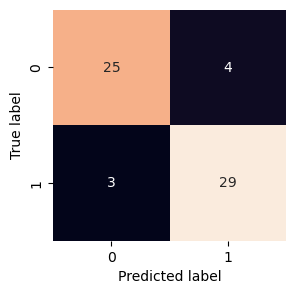

In [39]:
plot_conf_mat(y_test, y_preds)

In [40]:
# Classification Report
print(classification_report(y_test, y_preds))

# macro avg: doesn't take class imbalances into account
# weighted avg: does take class imbalances into account

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation

Calculate accuracy, precision, recall and f1-score of a model using cross-validation with `cross_val_score()`

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'max_iter': 1000, 'solver': 'liblinear'}

In [42]:
# Create a new classifier with the best params
clf = LogisticRegression(
    C=0.20433597178569418,
    max_iter=1000,
    solver="liblinear"
)

In [43]:
# Cross-val accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cv_acc)

0.8446994535519124

In [44]:
# Cross-val precision
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_pre)

0.8207936507936507

In [45]:
# Cross-val recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_rec)

0.9212121212121213

In [46]:
# Cross-val f1-score
cv_f1s = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1s)

0.8673007976269721

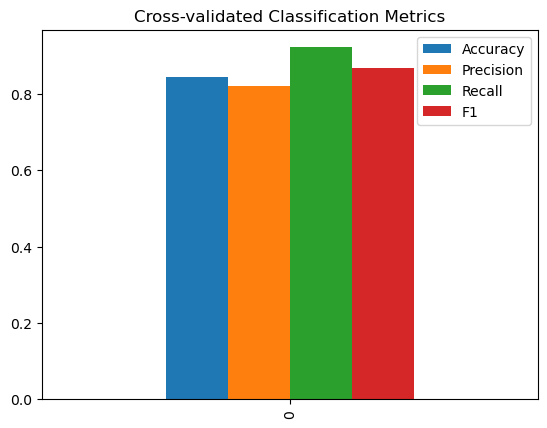

In [47]:
# Visualize cross-val metrics
cv_metrics = pd.DataFrame(
    {
        "Accuracy": np.mean(cv_acc),
        "Precision": np.mean(cv_pre),
        "Recall": np.mean(cv_rec),
        "F1": np.mean(cv_f1s)
    },
    index=[0]
)

cv_metrics.plot.bar(title="Cross-validated Classification Metrics");

## Feature importance

Feature importance means which features contribute most to the outcomes of the model and how.
Finding feature importance is different for each ML model.

### Feature importance for Logistic Regression

In [48]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(
    C=0.20433597178569418,
    max_iter=1000,
    solver="liblinear"
)

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, max_iter=1000, solver='liblinear')

In [49]:
# Check coef_ (coefficient of each parameter)

clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [50]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

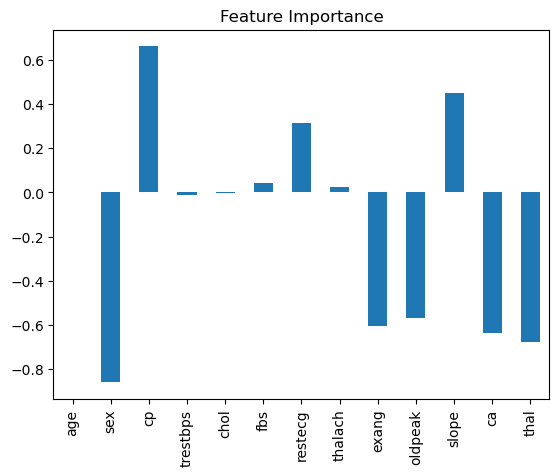

In [54]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);